**Proyecto final**

                Predecir si un paciente tiene Diabetes

Alejandro Solarte Melendez

Curso: Inteligencia Artifial Nivel Explorador
Talento Tech
Cohorte 5

Entregrado A:

Andres Felipe Escallon Portilla

Objetivo:

El objetivo es predecir, en función de las mediciones diagnósticas, si un paciente tiene diabetes

Introducción:

Este proyecto final se centra en el análisis predictivo de la diabetes utilizando un conjunto de datos clínicos. La motivación personal detrás de este estudio es significativa: mi padre ha sido diagnosticado con los primeros signos de diabetes, lo que me ha llevado a explorar cómo las mediciones diagnósticas pueden predecir la presencia de esta enfermedad. A través del análisis de este conjunto de datos, mi objetivo es no solo entender mejor cómo se manifiesta la diabetes, sino también identificar patrones y riesgos potenciales que puedan ayudar en la prevención y manejo de la enfermedad, tanto para mi padre como para otras personas en situaciones similares.

El conjunto de datos en cuestión proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales y ha sido utilizado para construir modelos predictivos que permiten evaluar la probabilidad de que una persona desarrolle diabetes con base en diversas mediciones clínicas. Al aplicar técnicas de análisis de datos y aprendizaje automático, este proyecto busca proporcionar una herramienta útil para la detección temprana de la diabetes y contribuir a la promoción de la salud preventiva.



**Conjunto de Datos sobre Diabetes en Mujeres de Ascendencia India Pima**

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir, en función de las mediciones diagnósticas, si un paciente tiene diabetes.

Contenido:

Se impusieron varias restricciones a la selección de estos casos de una base de datos más amplia. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad y de ascendencia india pima.

Datos:

Embarazos: Número de veces que estuvo embarazada

Glucosa: Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia a la glucosa oral

Presión arterial: Presión arterial diastólica (mm Hg)

Grosor de la piel: Grosor del pliegue cutáneo del tríceps (mm)

Insulina: Insulina sérica de 2 horas (mu U/ml)

IMC: Índice de masa corporal (peso en kg/(altura en m)^2)

Función de pedigrí de diabetes: Función de pedigrí de diabetes
Edad: Edad (años)

Resultado: Variable de clase (0 o 1)

Referencia:
Kaggle. (n.d.). Diabetes data set. Retrieved September 10, 2024, from https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download



Comenzamos importando Librerias Necesarias para poder elaborar el proyecto final.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
diabetes = pd.read_csv("diabetes.csv") #names=["Pregnancies",
                                              #"Glucose",
                                             # "BloodPressure",
                                             # "SkinThickness",
                                             # "Insulin",
                                              #"BMI",
                                             # "DiabetesPedigreeFunction",
                                             # "Age",
                                              #"Outcome"])
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Ese código lo estoy utilizando para leer un archivo CSV llamado "diabetes.csv" usando la librería pandas. Lo que hago es:

pd.read_csv("diabetes.csv"):
Estoy llamando a la función read_csv() de pandas (que la importé como pd) para leer el archivo CSV y convertirlo en un DataFrame, que es una estructura similar a una tabla de datos.

diabetes =:
Luego, guardo ese DataFrame en una variable llamada diabetes. De esta forma, puedo trabajar con los datos del archivo CSV como si fuera una tabla, usando las herramientas que me ofrece pandas.

Básicamente, este código me permite cargar los datos del archivo diabetes.csv para analizarlos o manipularlos en Python.

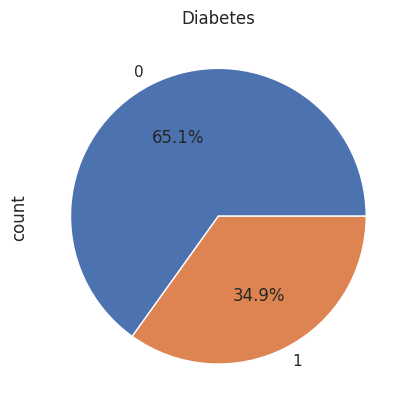

In [ ]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.title("Diabetes")
diabetes["Outcome"].value_counts().plot.pie(autopct="%1.1f%%");



svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']:
Aquí estoy definiendo una lista llamada svm_palette que contiene códigos de colores hexadecimales. Estos colores están listos para usarse en las visualizaciones. Aunque en este fragmento de código no se está utilizando directamente la paleta, se podría aplicar más adelante si quisiera personalizar los colores del gráfico.

plt.title("Diabetes"):
Le estoy poniendo un título al gráfico, en este caso, "Diabetes". Utilizo la función title() de la librería matplotlib.pyplot (que típicamente importo como plt).

diabetes["Outcome"].value_counts().plot.pie(autopct="%1.1f%%"):

1.Primero, accedo a la columna Outcome del DataFrame diabetes, que probablemente contiene valores categóricos, como "positivo" o "negativo" para diabetes.

2.Luego, con value_counts(), estoy contando cuántas veces aparece cada valor en esa columna (por ejemplo, cuántos casos son positivos y cuántos negativos).

3.Con plot.pie(), genero un gráfico de torta (pie chart) a partir de esos conteos.

4.El argumento autopct="%1.1f%%" se usa para mostrar el porcentaje de cada categoría en el gráfico, con un formato que tiene un decimal (por ejemplo, "45.5%").

En resumen, lo que estoy haciendo es crear un gráfico de torta que muestra la distribución porcentual de los diferentes valores en la columna "Outcome", y le doy el título "Diabetes" al gráfico.

In [ ]:
diabetes.head()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No hay valores nulos en el dataset. Ahora procederé a dividir los datos en conjuntos de entrenamiento (80%) y de prueba (20%). ​​

In [ ]:
#Matriz de correlacion
corr_matrix = diabetes.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


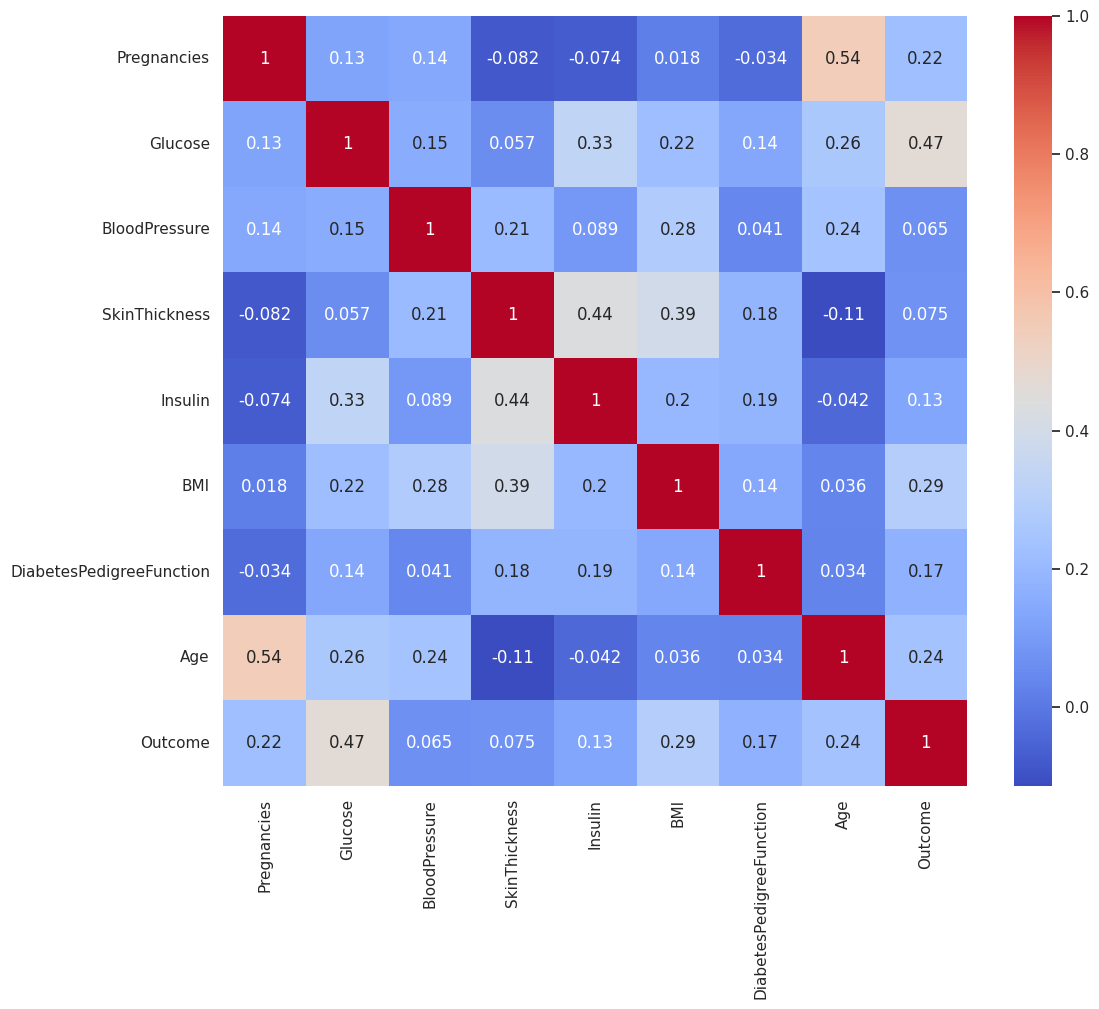

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aumentar el tamaño del mapa de calor
plt.figure(figsize=(12,10))

# Guardar el objeto del mapa de calor en una variable para acceder fácilmente a él.
# Establecer el rango
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Esta matriz de correlacion está diseñada para generar un mapa de calor (heatmap) que visualiza la correlación entre las variables de un conjunto de datos.

En resumen, este código crea un mapa de calor que visualiza la correlación entre las variables de mi conjunto de datos, mostrando los valores de correlación directamente sobre el gráfico, con una paleta de colores que facilita la interpretación visual.

In [ ]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tamaños de los conjuntos de entrenamiento y prueba
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(614, 8) (154, 8) (614,) (154,)


Conjunto de entrenamiento: 614 observaciones (80% de los datos).
Conjunto de prueba: 154 observaciones (20% de los datos).
A continuación, entrenaré un modelo de regresión logística utilizando el conjunto de entrenamiento. Luego, lo evaluaré usando el conjunto de prueba.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import confusion_matrix, r2_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)


# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print("Área bajo la curva ROC (AUC):", roc_auc)


Matriz de Confusión:
 [[78 21]
 [18 37]]
Área bajo la curva ROC (AUC): 0.8130394857667584


In [ ]:
# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



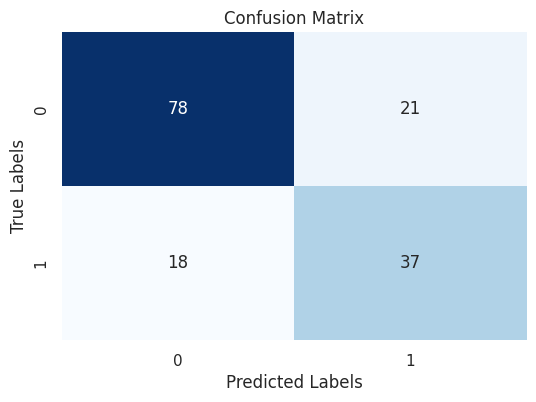

In [ ]:
import seaborn as sns

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Explicacion:

La matriz de confusión muestra los resultados de la clasificación en términos de:

Verdaderos negativos (0,0): Pacientes sin diabetes correctamente clasificados.

Falsos positivos (0,1): Pacientes sin diabetes que fueron incorrectamente clasificados como diabéticos.

Falsos negativos (1,0): Pacientes con diabetes que fueron incorrectamente clasificados como no diabéticos.

Verdaderos positivos (1,1): Pacientes con diabetes correctamente clasificados.

**Conclusión:**

La matriz de confusión nos permite ver cómo el modelo se desempeña en términos de aciertos y errores. Un número alto de verdaderos negativos y verdaderos positivos indica un buen desempeño en la clasificación correcta de los casos. Sin embargo, la presencia de falsos negativos (pacientes con diabetes no detectada) es un problema significativo, especialmente en aplicaciones de salud, ya que puede implicar la falta de tratamiento oportuno.

In [ ]:
import matplotlib.pyplot as plt

# Graficar la curva ROC con Plotly
roc_fig = go.Figure()
roc_fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC curve (area = {roc_auc:.2f})', line=dict(color='blue')))
roc_fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(color='gray', dash='dash')))
roc_fig.update_layout(title='Receiver Operating Characteristic (ROC) Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
roc_fig.show()



In [ ]:
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

AUC: 0.8130394857667584


**Curva ROC y AUC (Área Bajo la Curva)**

La curva ROC muestra la tasa de verdaderos positivos frente a la tasa de falsos positivos a diferentes umbrales de clasificación. El área bajo la curva (AUC) es una medida de la capacidad del modelo para distinguir entre clases.

**Conclusión:**

En nuestro caso, el valor de AUC es aproximadamente 0.813. Esto indica que el modelo tiene una buena capacidad para distinguir entre pacientes con y sin diabetes. Un AUC cercano a 1 indica un modelo excelente, mientras que un AUC de 0.5 indica un modelo que no tiene poder discriminativo (equivalente a adivinar al azar). Por lo tanto, un AUC de 0.813 sugiere un rendimiento aceptable del modelo, pero hay margen para mejorar, quizás ajustando hiperparámetros o utilizando características adicionales.

In [ ]:
# Calcular y graficar el histograma de los residuos con Plotly
residuals = y_test - y_pred
residuals_fig = go.Figure()
residuals_fig.add_trace(go.Histogram(x=residuals, nbinsx=20, marker_color='purple'))
residuals_fig.update_layout(title='Histogram of Residuals', xaxis_title='Residuals', yaxis_title='Frequency')
residuals_fig.show()

**Histograma de Residuos**

El histograma de residuos muestra la diferencia entre los valores observados y los valores predichos. En el contexto de un modelo de clasificación, los residuos pueden interpretarse como errores de predicción (0 si el modelo acertó, 1 si no).

**Conclusión:**

Un histograma de residuos que muestra una distribución equilibrada entre 0 y 1 puede sugerir que el modelo está teniendo dificultades para clasificar ciertos casos, posiblemente aquellos que se encuentran cerca de la frontera de decisión. Si los residuos se agrupan hacia un lado, podría indicar un sesgo sistemático en las predicciones.

**Conclusiones**

Desempeño del Modelo: El modelo de regresión logística entrenado presenta un rendimiento razonable en términos de clasificación de pacientes con diabetes. La matriz de confusión y el AUC de 0.813 indican que el modelo puede distinguir entre pacientes con y sin diabetes en una medida aceptable.

**Mejoras Potenciales:**

**Ajuste de Hiperparámetros:** Podríamos experimentar con otros modelos o ajustar los hiperparámetros del modelo de regresión logística para mejorar el rendimiento.

Referencias:

Este trabajo se elaboró con las instrucciones de los profesores Andres Felipe Escallon Portilla y Abel Fernando Becerra Carrillo que nos aportó diferentes herramientas como cursos cortos de Microsoft y varios PDF de la plataforma de aprendizaje de Talentotech. Se utilizaron también herramientas de inteligencia artificial como Gemini y ChatGPT.

Agradecimientos

Por estar pendientes en todo momento con información y enseñandonos, agradecimientos a los instrutores y monitor.

Andres Felipe Escallon Portilla

Abel Fernando Becerra Carrillo

Ricardo Andrés Lopez


